# &#128060; Código Parcial Métodos Numéricos &#128060; 

## Ejercicio 1

Suponga que se está diseñando un tanque esférico para almacenar agua para un poblado pequeño de un país en desarrollo. El volumen del líquido que puede contener, se calcula con 

$V = \pi h^2\cdot \frac{3R-h}{3}$

donde $V = $ volumen $[m^3]$, $h = $ profundidad del agua en el tanque $[m]$ y $R = $ radio del tanque $[m]$. Si $R = 3m$

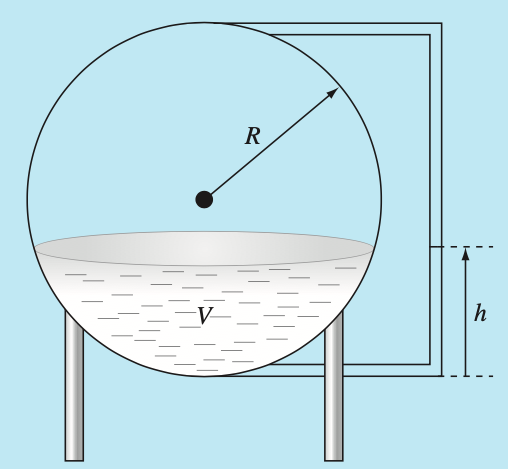

¿A qué profundidad debe llenarse  el tanque de modo que contenga $30 m^3$? Realice tantas iteraciones hasta que $\epsilon_a <\epsilon_s = 0.003\%$

Use dos métodos numéricos y compare.

### Método de Newton-Raphson👨‍🎓

+---------------+-------------------+--------------+
|   Iteraciones |   Raíz Aproximada |     Error(%) |
+===============+===================+==============+
|             1 |           2.37653 | 57.9218      |
+---------------+-------------------+--------------+
|             2 |           2.03741 | 16.6445      |
+---------------+-------------------+--------------+
|             3 |           2.02692 |  0.517586    |
+---------------+-------------------+--------------+
|             4 |           2.02691 |  0.000651414 |
+---------------+-------------------+--------------+


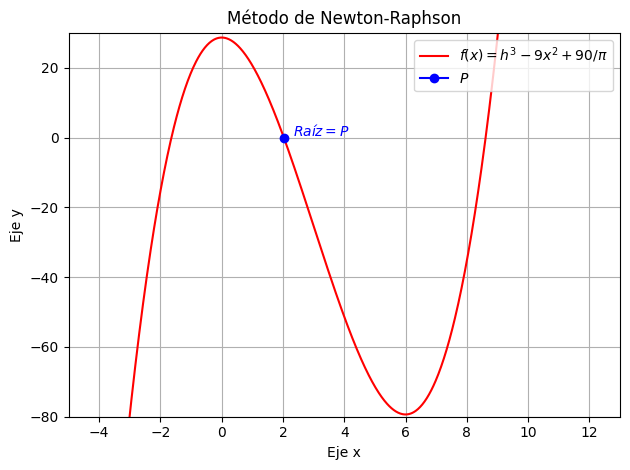

In [7]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Método de Newton Raphson ###
#------------------------------------------------------------------------------------------

data = []

def MetodoNR(f, df, h_0, iteraciones = 1):
    i = 0
    while(i <= iteraciones):
      h_n = h_0 - f(h_0)/df(h_0)
      i += 1
      error = abs((h_n - h_0)/h_n)*100
      Lista = [i, h_n, error]
      data.append(Lista)
      h_0 = h_n
      if(error < 0.003):
        break
    return(h_n)

#------------------------------------------------------------------------------------------
### Se define la función ###
#------------------------------------------------------------------------------------------

def f_1(h):
  return(h**3 - 9*h**2 + 90/np.pi)

def df_1(h):
  return(3*h**2 - 18*h)

#------------------------------------------------------------------------------------------
### Se llama la función ###
#------------------------------------------------------------------------------------------

Raiz = MetodoNR(f_1, df_1, 1, 10)

Eval = f_1(Raiz)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

head = ["Iteraciones", "Raíz Aproximada", "Error(%)"]

print(tabulate(data,headers=head,tablefmt="grid")) 

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Método de Newton-Raphson")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

x = np.linspace(-5, 13, 1000)

## Grafica de la Función

ax1.plot(x, f_1(x), "r", label = "$f(x) = h^3 - 9x^2 + 90/\pi$")      #Función 
ax1.plot(Raiz, Eval, marker = "o", color = "b", label = "$P$")   #Raíz aproximada de la función

v = [-5,13,-80,30]         #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("Método de Newton-Raphson")
plt.grid()
plt.axis(v)
plt.text(Raiz + 0.3, Eval + 0.3 , "$Raíz=P$", color="b")
plt.legend(loc=1)

plt.tight_layout()
plt.show()

### Método de la Secante✍

+---------------+-------------------+--------------+
|   Iteraciones |   Raíz Aproximada |     Error(%) |
+===============+===================+==============+
|             1 |           2.75727 | 63.7322      |
+---------------+-------------------+--------------+
|             2 |           1.9195  | 43.6452      |
+---------------+-------------------+--------------+
|             3 |           2.01984 |  4.96804     |
+---------------+-------------------+--------------+
|             4 |           2.027   |  0.353121    |
+---------------+-------------------+--------------+
|             5 |           2.02691 |  0.00477112  |
+---------------+-------------------+--------------+
|             6 |           2.02691 |  4.08049e-06 |
+---------------+-------------------+--------------+


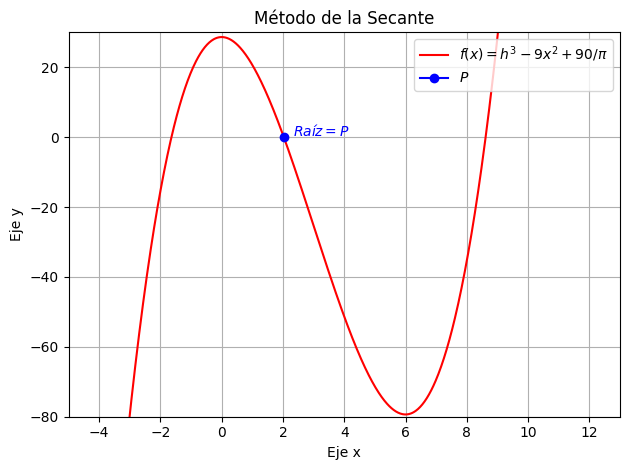

In [9]:
#------------------------------------------------------------------------------------------
### Importación de librerías ###
#------------------------------------------------------------------------------------------

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

#------------------------------------------------------------------------------------------
### Método de la Secante ###
#------------------------------------------------------------------------------------------

data = []

def MetodoSecante(f, h_00, h_01, iteraciones = 1):
    i = 0
    while(i <= iteraciones):
      h_n = h_01 - (f(h_01)*(h_00 - h_01))/(f(h_00) - f(h_01))
      i += 1
      error = abs(((h_n - h_01)/h_n)*100)
      Lista = [i, h_n, error]
      data.append(Lista)
      h_00 = h_01
      h_01 = h_n
      if (error < 0.003):
         break
    return(h_n)

#------------------------------------------------------------------------------------------
### Se define la función ###
#------------------------------------------------------------------------------------------

def f_1(h):
  return(h**3 - 9*h**2 + 90/np.pi)

#------------------------------------------------------------------------------------------
### Se llama la función ###
#------------------------------------------------------------------------------------------

Raiz = MetodoSecante(f_1, 0.5, 1, 10)

Eval = f_1(Raiz)

#------------------------------------------------------------------------------------------
### Imprimir ###
#------------------------------------------------------------------------------------------

head = ["Iteraciones", "Raíz Aproximada", "Error(%)"]

print(tabulate(data,headers=head,tablefmt="grid")) 

#------------------------------------------------------------------------------------------
### Gráficas ###
#------------------------------------------------------------------------------------------

## Definiendo las gráficas

fig_1 = plt.figure("Método de la Secante")

ax1 = fig_1.add_subplot()

## Llamo la función a graficar

x = np.linspace(-5, 13, 1000)

## Grafica de la Función

ax1.plot(x, f_1(x), "r", label = "$f(x) = h^3 - 9x^2 + 90/\pi$")      #Función 
ax1.plot(Raiz, Eval, marker = "o", color = "b", label = "$P$")   #Raíz aproximada de la función

v = [-5,13,-80,30]         #Acotamiento de la gráfica para x, y

#Detalles de la gráfica

plt.subplot()
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("Método de la Secante")
plt.grid()
plt.axis(v)
plt.text(Raiz + 0.3, Eval + 0.3 , "$Raíz=P$", color="b")
plt.legend(loc=1)

plt.tight_layout()
plt.show()